In [14]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import umap
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

2008_commentors_with_clusters.csv


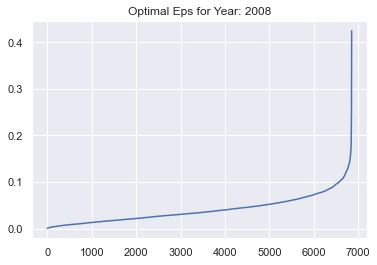

2009_commentors_with_clusters.csv


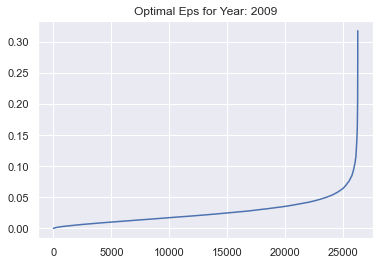

2010_commentors_with_clusters.csv


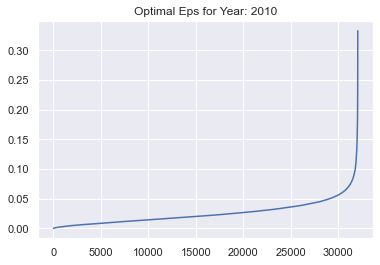

2011_commentors_with_clusters.csv


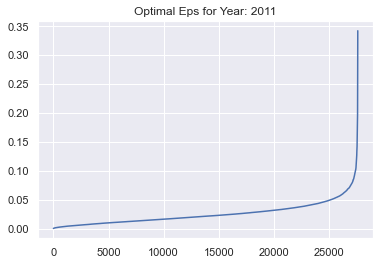

2012_commentors_with_clusters.csv


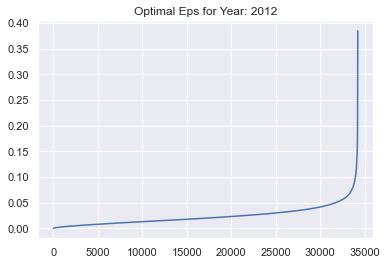

2013_commentors_with_clusters.csv


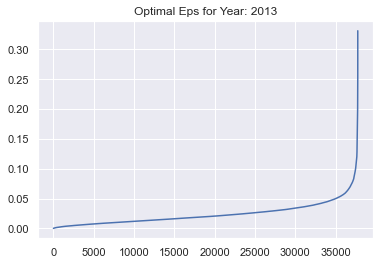

2014_commentors_with_clusters.csv


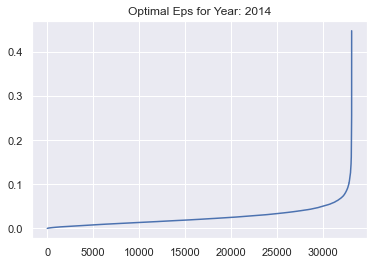

2015_commentors_with_clusters.csv


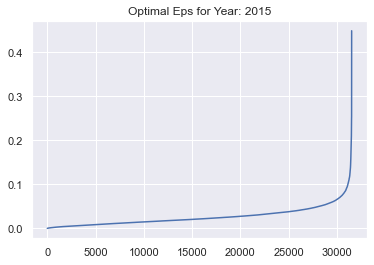

2016_commentors_with_clusters.csv


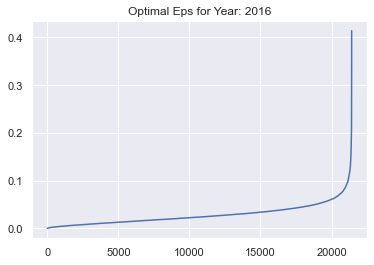

2017_commentors_with_clusters.csv


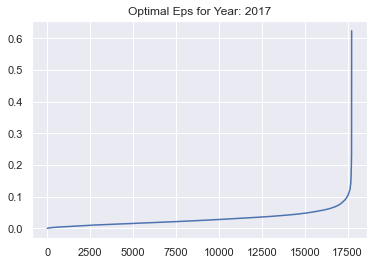

2018_commentors_with_clusters.csv


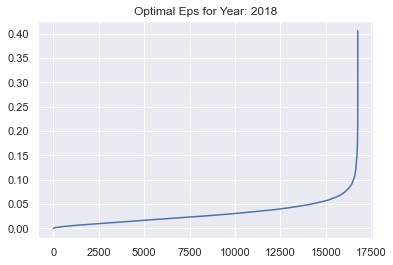

2019_commentors_with_clusters.csv


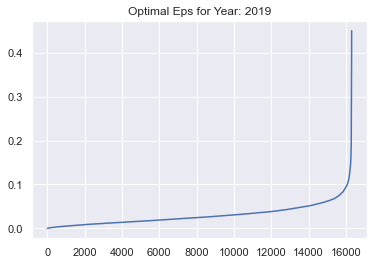

2020_commentors_with_clusters.csv


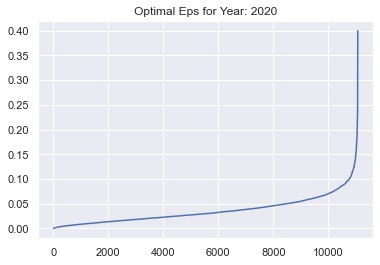

In [41]:
commentor_years = os.listdir('../data/cleaned/yearly_comment_w_clusters/')
for year in commentor_years:
    print(year)

    # Load data, scale, and DR
    df_features = pd.read_csv(f'../data/cleaned/yearly_comment_w_clusters/{year}', header=0, index_col=0)
    df_features.shape

    to_drop = ['assigned_cluster']
    df_features.drop(to_drop, axis=1, inplace=True)
    df_features.fillna(0, inplace=True)
    df_features.columns = [c.lower().replace(' ','_') for c in df_features.columns]
    scaler = MinMaxScaler(feature_range=[0, 1])
    commentors_rescaled = scaler.fit_transform(df_features)
    reducer = umap.UMAP(n_components=2, random_state=42)
    embedding = reducer.fit_transform(commentors_rescaled)

    # check optimal eps
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(embedding)
    distances, indices = nbrs.kneighbors(embedding)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.title(f'Optimal Eps for Year: {year[:4]}')
    plt.show()